In [1]:
import sys
# setting path
sys.path.append("/home/ky2446/simclr")
sys.path.append("/home/ky2446/simclr/simclr")
sys.path.append("/home/ky2446/simclr/simclr/layers")
sys.path.append("/home/ky2446/simclr/simclr/models")
sys.path.append("/home/ky2446/simclr/simclr/loss")
sys.path.append("/home/ky2446/simclr/simclr/optim")
sys.path.append("/home/ky2446/simclr/simclr/dataloader")

In [2]:
from simclrpy import SimClr
from ntxent import nt_xent_loss
from ntxentgit import SimCLR_Loss
from augment import TransformsSimCLR
from utils import *
from LARS import LARS
from downstream import DownStream
from dataloader import *

In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
train_loader_simclr = train_loader_simclr("CIFAR10",128)
test_loader = test_loader("CIFAR10",128)
test_images, test_labels = get_testimgs_list("CIFAR10")

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [5]:
proj_dim = 64
model = SimClr('resnet50',proj_dim).cuda()
temperature = 0.5
#criterion = nt_xent_loss
criterion = SimCLR_Loss(128,0.5)
optimizer = "Adam"
model, train_loss = train_simclr(train_loader_simclr,model,criterion,optimizer,100,128,True,"/home/ky2446/saved-models/CIFAR10-RES50-SIMCLR-BS128-PD64-ADAM")

Epoch: 0, step: 50/390, loss: 5.541714191436768
Epoch: 0, step: 100/390, loss: 5.528379917144775
Epoch: 0, step: 150/390, loss: 5.335732936859131
Epoch: 0, step: 200/390, loss: 5.296202659606934
Epoch: 0, step: 250/390, loss: 5.207955360412598
Epoch: 0, step: 300/390, loss: 5.247541904449463
Epoch: 0, step: 350/390, loss: 5.136037826538086
Epoch: 0 completed, average loss: 5.347435405926826, time taken: 0.9784109234809876 mins
Epoch: 1, step: 50/390, loss: 5.063374996185303
Epoch: 1, step: 100/390, loss: 4.898366928100586
Epoch: 1, step: 150/390, loss: 5.160389423370361
Epoch: 1, step: 200/390, loss: 4.921266078948975
Epoch: 1, step: 250/390, loss: 5.008535385131836
Epoch: 1, step: 300/390, loss: 4.8974175453186035
Epoch: 1, step: 350/390, loss: 4.801013946533203
Epoch: 1 completed, average loss: 4.982297826424623, time taken: 0.9477085630098979 mins
Epoch: 2, step: 50/390, loss: 4.929309844970703
Epoch: 2, step: 100/390, loss: 4.848935604095459
Epoch: 2, step: 150/390, loss: 4.8505301

Epoch: 19, step: 50/390, loss: 4.214625358581543
Epoch: 19, step: 100/390, loss: 4.259737491607666
Epoch: 19, step: 150/390, loss: 4.209160327911377
Epoch: 19, step: 200/390, loss: 4.207788944244385
Epoch: 19, step: 250/390, loss: 4.315921306610107
Epoch: 19, step: 300/390, loss: 4.263549327850342
Epoch: 19, step: 350/390, loss: 4.233273029327393
Epoch: 19 completed, average loss: 4.248796258828579, time taken: 0.966874607404073 mins
Epoch: 20, step: 50/390, loss: 4.281632423400879
Epoch: 20, step: 100/390, loss: 4.243159294128418
Epoch: 20, step: 150/390, loss: 4.210104942321777
Epoch: 20, step: 200/390, loss: 4.221617221832275
Epoch: 20, step: 250/390, loss: 4.214272975921631
Epoch: 20, step: 300/390, loss: 4.217483043670654
Epoch: 20, step: 350/390, loss: 4.320334434509277
Epoch: 20 completed, average loss: 4.244018705074604, time taken: 0.9549369970957439 mins
Epoch: 21, step: 50/390, loss: 4.202402114868164
Epoch: 21, step: 100/390, loss: 4.245851516723633
Epoch: 21, step: 150/390

Epoch: 37, step: 350/390, loss: 4.245105266571045
Epoch: 37 completed, average loss: 4.17536877363156, time taken: 0.9434629559516907 mins
Epoch: 38, step: 50/390, loss: 4.211002349853516
Epoch: 38, step: 100/390, loss: 4.135268211364746
Epoch: 38, step: 150/390, loss: 4.1551666259765625
Epoch: 38, step: 200/390, loss: 4.192165374755859
Epoch: 38, step: 250/390, loss: 4.196189880371094
Epoch: 38, step: 300/390, loss: 4.165858745574951
Epoch: 38, step: 350/390, loss: 4.116433143615723
Epoch: 38 completed, average loss: 4.168588182253715, time taken: 0.925615652402242 mins
Epoch: 39, step: 50/390, loss: 4.213598251342773
Epoch: 39, step: 100/390, loss: 4.105805397033691
Epoch: 39, step: 150/390, loss: 4.188473224639893
Epoch: 39, step: 200/390, loss: 4.160001277923584
Epoch: 39, step: 250/390, loss: 4.225940704345703
Epoch: 39, step: 300/390, loss: 4.153600692749023
Epoch: 39, step: 350/390, loss: 4.223080635070801
Epoch: 39 completed, average loss: 4.162405520219069, time taken: 0.96639

Epoch: 56, step: 250/390, loss: 4.110506057739258
Epoch: 56, step: 300/390, loss: 4.128668308258057
Epoch: 56, step: 350/390, loss: 4.122603416442871
Epoch: 56 completed, average loss: 4.131174733699896, time taken: 0.9481040557225545 mins
Epoch: 57, step: 50/390, loss: 4.148905277252197
Epoch: 57, step: 100/390, loss: 4.16014289855957
Epoch: 57, step: 150/390, loss: 4.08035945892334
Epoch: 57, step: 200/390, loss: 4.104180335998535
Epoch: 57, step: 250/390, loss: 4.112277030944824
Epoch: 57, step: 300/390, loss: 4.152058124542236
Epoch: 57, step: 350/390, loss: 4.120716571807861
Epoch: 57 completed, average loss: 4.1267281043223845, time taken: 0.9736664930979411 mins
Epoch: 58, step: 50/390, loss: 4.1793084144592285
Epoch: 58, step: 100/390, loss: 4.168908596038818
Epoch: 58, step: 150/390, loss: 4.104461193084717
Epoch: 58, step: 200/390, loss: 4.205812454223633
Epoch: 58, step: 250/390, loss: 4.082683086395264
Epoch: 58, step: 300/390, loss: 4.139416217803955
Epoch: 58, step: 350/3

Epoch: 75, step: 150/390, loss: 4.026205062866211
Epoch: 75, step: 200/390, loss: 4.151582717895508
Epoch: 75, step: 250/390, loss: 4.130720138549805
Epoch: 75, step: 300/390, loss: 4.182042598724365
Epoch: 75, step: 350/390, loss: 4.0890326499938965
Epoch: 75 completed, average loss: 4.099539260986524, time taken: 0.9153995434443156 mins
Epoch: 76, step: 50/390, loss: 4.092307090759277
Epoch: 76, step: 100/390, loss: 4.095676422119141
Epoch: 76, step: 150/390, loss: 4.077334403991699
Epoch: 76, step: 200/390, loss: 4.072711944580078
Epoch: 76, step: 250/390, loss: 4.112860679626465
Epoch: 76, step: 300/390, loss: 4.087353229522705
Epoch: 76, step: 350/390, loss: 4.145196437835693
Epoch: 76 completed, average loss: 4.092668635417254, time taken: 0.9559266328811645 mins
Epoch: 77, step: 50/390, loss: 4.1251606941223145
Epoch: 77, step: 100/390, loss: 4.06082010269165
Epoch: 77, step: 150/390, loss: 4.075681686401367
Epoch: 77, step: 200/390, loss: 4.113114356994629
Epoch: 77, step: 250/

Epoch: 94, step: 50/390, loss: 4.140028953552246
Epoch: 94, step: 100/390, loss: 4.065598487854004
Epoch: 94, step: 150/390, loss: 4.128742218017578
Epoch: 94, step: 200/390, loss: 4.101351261138916
Epoch: 94, step: 250/390, loss: 4.048216342926025
Epoch: 94, step: 300/390, loss: 4.117559909820557
Epoch: 94, step: 350/390, loss: 4.046790599822998
Epoch: 94 completed, average loss: 4.076703632794894, time taken: 0.9464420040448507 mins
Epoch: 95, step: 50/390, loss: 4.023066520690918
Epoch: 95, step: 100/390, loss: 4.097072124481201
Epoch: 95, step: 150/390, loss: 4.046652317047119
Epoch: 95, step: 200/390, loss: 4.025625228881836
Epoch: 95, step: 250/390, loss: 4.046693801879883
Epoch: 95, step: 300/390, loss: 4.076125621795654
Epoch: 95, step: 350/390, loss: 4.094606876373291
Epoch: 95 completed, average loss: 4.075824690476442, time taken: 0.9436774969100952 mins
Epoch: 96, step: 50/390, loss: 4.0668768882751465
Epoch: 96, step: 100/390, loss: 4.114541530609131
Epoch: 96, step: 150/3

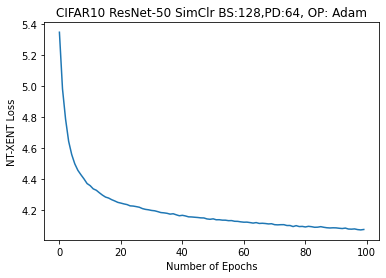

In [6]:
plt.xlabel("Number of Epochs")
plt.ylabel("NT-XENT Loss")
plt.title("CIFAR10 ResNet-50 SimClr BS:128,PD:64, OP: Adam")
plt.plot(train_loss)
plt.savefig("/home/ky2446/figures/CIFAR10-RES50-SIMCLR-BS128-PD64-ADAM.png")

In [10]:
with open("/home/ky2446/training-logs/CIFAR10-RES50-BS128-PD64-ADAM", "wb") as fp:   #Pickling
  pickle.dump(train_loss, fp)